In [4]:
import pandas as pd
from medvqa.datasets.iuxray import IUXRAY_REPORTS_JSON_PATH, IUXRAY_REPORTS_MIN_JSON_PATH
from medvqa.utils.files import load_json

In [2]:
mti_tags_df = pd.read_csv("/mnt/workspace/iu-x-ray/dataset/mti-tags.csv")

In [3]:
mti_tags_df

,filename,calcified granuloma,atelectases,mass lesion,opacity,atelectasis,ribs,diffuse fibrosis,fibrosis,pulmonary fibrosis,...,knee joint,knee prosthesis,osteoarthritis knee,mitral valve replacement,comminuted fracture,pneumomediastinum,fracture comminuted,lung volume reduction,pleural disease,pulmonary metastasis
0,1.xml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.xml,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100.xml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000.xml,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1001.xml,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,995.xml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3951,996.xml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3952,997.xml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3953,998.xml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
filenames = mti_tags_df['filename'].tolist()

In [20]:
tags = mti_tags_df.columns[1:].tolist()

In [23]:
labels = mti_tags_df[tags].values
labels.shape

(3955, 586)

In [6]:
reports = load_json(IUXRAY_REPORTS_MIN_JSON_PATH)

In [9]:
keys = list(reports.keys())

In [10]:
len(keys)

3955

In [43]:
key = keys[10]
reports[key]

{'filename': '3852.xml',
 'images': [{'id': 'CXR3852_IM-1949-1001',
   'caption': 'Chest XXXX and lateral'},
  {'id': 'CXR3852_IM-1949-4004', 'caption': 'Chest XXXX and lateral'}],
 'comparison': 'None available.',
 'indication': 'XXXX-year-old male status post XXXX on right side.',
 'findings': 'Heart size is normal. No pneumothorax or focal airspace disease. No pleural effusion. Eventration of the right hemidiaphragm. Mild degenerative changes of the thoracic spine without fracture.',
 'impression': 'No acute cardiopulmonary findings.',
 'tags_manual': ['Diaphragmatic Eventration/right',
  'Thoracic Vertebrae/degenerative/mild'],
 'tags_auto': ['degenerative change', 'eventration', 'Diaphragm']}

In [44]:
i = filenames.index(key)
for j, tag in enumerate(tags):
    if labels[i,j] == 1:
        print(tag)

degenerative change
diaphragm
eventration


In [49]:
manual_tags = set()
for key in keys:
    manual_tags.update(reports[key]['tags_manual'])
manual_tags = list(manual_tags)
manual_tags.sort()

In [50]:
len(manual_tags)

1719

In [55]:
for i, x in enumerate(manual_tags):
    if 'lister' in x:
        print(x)

Blister/lung/apex/bilateral
Blister/lung/upper lobe/bilateral
Blister/lung/upper lobe/bilateral/multiple
Blister/lung/upper lobe/right


In [56]:
max((len(x), x) for x in manual_tags)

(66, 'Opacity/lung/upper lobe/bilateral/reticular/round/multiple/chronic')

In [51]:
manual_tags[:100]

['Abdomen/enlarged/mild',
 'Abdomen/enlarged/severe',
 'Adipose Tissue/lung/base/right',
 'Adipose Tissue/mediastinum',
 'Adipose Tissue/pleura/left',
 'Adipose Tissue/right',
 'Airspace Disease/lung',
 'Airspace Disease/lung/apex/left/patchy',
 'Airspace Disease/lung/base',
 'Airspace Disease/lung/base/bilateral',
 'Airspace Disease/lung/base/bilateral/mild',
 'Airspace Disease/lung/base/bilateral/patchy',
 'Airspace Disease/lung/base/bilateral/patchy/mild',
 'Airspace Disease/lung/base/bilateral/streaky/mild',
 'Airspace Disease/lung/base/left',
 'Airspace Disease/lung/base/left/focal',
 'Airspace Disease/lung/base/left/mild',
 'Airspace Disease/lung/base/left/patchy',
 'Airspace Disease/lung/base/left/severe',
 'Airspace Disease/lung/base/left/streaky',
 'Airspace Disease/lung/base/left/streaky/mild',
 'Airspace Disease/lung/base/patchy',
 'Airspace Disease/lung/base/pulmonary alveoli/right',
 'Airspace Disease/lung/base/right',
 'Airspace Disease/lung/base/right/acute',
 'Airspace 

In [62]:
!python ../../scripts/iuxray/convert_manual_tags_to_sentences_with_openai.py \
--max_requests_per_minute 9500 \
--max_tokens_per_minute 1500000 \
--max_tokens_per_request 100 \
--logging_level "INFO" \
--api_key_name "OPENAI_API_KEY_1" \
--openai_model_name "gpt-4-1106-preview"

2024-05-09 11:37:53,856 - INFO - Loaded 10 already processed queries from /home/pamessina/medvqa-workspace/cache/iuxray/openai/gpt-4-1106-preview_manual_tags_to_sentences.jsonl
2024-05-09 11:37:53,931 - INFO - Queries to make: 1719 (before removing queries that have already been processed)
2024-05-09 11:37:53,932 - INFO - Queries to make: 1709 (after removing queries that have already been processed)
2024-05-09 11:37:53,932 - INFO - Removed 10 queries that have already been processed
2024-05-09 11:37:53,932 - INFO - Example queries to make:
2024-05-09 11:37:53,932 - INFO - Query 1399: Pneumothorax/right/small
2024-05-09 11:37:53,932 - INFO - Query 129: Calcified Granuloma/lung/bilateral/scattered
2024-05-09 11:37:53,932 - INFO - Query 349: Cicatrix/lung/middle lobe/right/chronic
2024-05-09 11:37:53,936 - INFO - Saving API requests to /home/pamessina/medvqa-workspace/tmp/iuxray/openai/api_requests_20240509_113753.jsonl
2024-05-09 11:37:53,936 - INFO - Saving API responses to /home/pames

In [87]:
!python ../../scripts/iuxray/convert_manual_tags_to_sentences_with_openai.py \
--max_requests_per_minute 9500 \
--max_tokens_per_minute 1500000 \
--max_tokens_per_request 100 \
--logging_level "INFO" \
--api_key_name "OPENAI_API_KEY_1" \
--openai_model_name "gpt-4-1106-preview"

2024-05-09 12:00:08,497 - INFO - Queries to make: 1658 (before removing queries that have already been processed)
2024-05-09 12:00:08,497 - INFO - Queries to make: 1658 (after removing queries that have already been processed)
2024-05-09 12:00:08,498 - INFO - Removed 0 queries that have already been processed
2024-05-09 12:00:08,498 - INFO - Example queries to make:
2024-05-09 12:00:08,498 - INFO - Query 892: Lymph nodes/left/enlarged
2024-05-09 12:00:08,498 - INFO - Query 947: Mass/breast/large
2024-05-09 12:00:08,498 - INFO - Query 541: Density/lung/right/round/multiple
2024-05-09 12:00:08,502 - INFO - Saving API requests to /home/pamessina/medvqa-workspace/tmp/iuxray/openai/api_requests_20240509_120008.jsonl
2024-05-09 12:00:08,502 - INFO - Saving API responses to /home/pamessina/medvqa-workspace/tmp/iuxray/openai/api_responses_20240509_120008.jsonl
2024-05-09 12:00:08,965 - INFO - Starting request #0
2024-05-09 12:00:09,118 - INFO - Starting request #50
2024-05-09 12:00:09,273 - IN

In [59]:
from medvqa.utils.files import load_jsonl

In [88]:
tmp = load_jsonl('/home/pamessina/medvqa-workspace/cache/iuxray/openai/gpt-4-1106-preview_manual_tags_to_sentences(with_forward_slash).jsonl')

In [89]:
len(tmp)

1658

In [90]:
tmp[-10:]

[{'metadata': {'query': 'Scoliosis/thoracic vertebrae/right/moderate'},
  'parsed_response': 'Moderate scoliosis of the right thoracic vertebrae'},
 {'metadata': {'query': 'Sutures/mediastinum'},
  'parsed_response': 'Sutures present in the mediastinum.'},
 {'metadata': {'query': 'Lumbar Vertebrae/degenerative/multiple'},
  'parsed_response': 'Multiple degenerative lumbar vertebrae.'},
 {'metadata': {'query': 'Shoulder/degenerative'},
  'parsed_response': 'Degenerative changes in the shoulder.'},
 {'metadata': {'query': 'Shoulder/bilateral/degenerative/severe'},
  'parsed_response': 'Severe degenerative changes in both shoulders.'},
 {'metadata': {'query': 'Opacity/mediastinum/posterior/round'},
  'parsed_response': 'Round opacity in the posterior mediastinum'},
 {'metadata': {'query': 'Pulmonary Emphysema/base/bilateral'},
  'parsed_response': 'Bilateral pulmonary emphysema at the base of the lungs.'},
 {'metadata': {'query': 'Scoliosis/lumbar vertebrae/moderate'},
  'parsed_response'

In [92]:
responses = [x['parsed_response'] for x in tmp]
aux = max((len(x), x, i) for i, x in enumerate(responses))
print(aux)
print(tmp[aux[-1]])

(85, 'Severe diffuse bilateral interstitial lung opacity with reticular and round patterns.', 1160)
{'metadata': {'query': 'Opacity/lung/bilateral/interstitial/diffuse/reticular/round/severe'}, 'parsed_response': 'Severe diffuse bilateral interstitial lung opacity with reticular and round patterns.'}


In [76]:
anomalous_cases = []
for x in tmp:
    q = x['metadata']['query']
    r = x['parsed_response']
    if len(q) * 3 < len(r):
        anomalous_cases.append(x)

In [77]:
len(anomalous_cases)

8

In [78]:
anomalous_cases

[{'metadata': {'query': 'Cicatrix'},
  'parsed_response': 'Presence of a cicatrix (scar tissue).'},
 {'metadata': {'query': 'Cystic Fibrosis'},
  'parsed_response': 'Cystic fibrosis is a genetic disorder characterized by the production of abnormally thick and sticky mucus, leading to severe respiratory and digestive system complications.'},
 {'metadata': {'query': 'Nodule'}, 'parsed_response': 'Presence of a nodule.'},
 {'metadata': {'query': 'No Indexing'},
  'parsed_response': 'The X-ray report indicates that there is no indexing present.'},
 {'metadata': {'query': 'Medical Device'},
  'parsed_response': 'The X-ray report indicates the presence of a medical device.'},
 {'metadata': {'query': 'Pneumoperitoneum'},
  'parsed_response': 'Presence of free air within the peritoneal cavity.'},
 {'metadata': {'query': 'Stents'},
  'parsed_response': 'Coronary stents placed'},
 {'metadata': {'query': 'normal'},
  'parsed_response': 'Normal findings on the X-ray report.'}]

In [96]:
!python ../../scripts/iuxray/export_image_id_to_pos_neg_facts.py \
--manual_tags_with_slashes_to_sentences_jsol_filepath \
"/home/pamessina/medvqa-workspace/cache/iuxray/openai/gpt-4-1106-preview_manual_tags_to_sentences(with_forward_slash).jsonl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4

Computing positive and negative facts per image...
Loading IUXray reports from /mnt/workspace/iu-x-ray/dataset/reports/reports.min.json...
Loading manual tags with slashes to sentences from /home/pamessina/medvqa-workspace/cache/iuxray/openai/gpt-4-1106-preview_manual_tags_to_sentences(with_forward_slash).jsonl...
Loaded 1658 tags.
100%|███████████████████████████████████| 3955/3955 [00:00<00:00, 149891.32it/s]
Computing negative facts...
100%|█████████████████████████████████████| 3955/3955 [00:01<00:00, 2827.58it/s]
Assigning positive and negative facts to each image...
100%|█████████████████████████████████████| 3955/3955 [00:00<00:00, 9542.17it/s]
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9337.pt']
  0%|                                                  | 0/2331 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=44

In [97]:
from medvqa.utils.files import load_pickle

In [98]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/iuxray/image_id_to_pos_neg_facts(hash=450,2802712764817701122).pkl')

In [99]:
tmp.keys()

dict_keys(['facts', 'embeddings', 'image_id_to_pos_neg_facts'])

In [104]:
len(tmp['facts']), tmp['embeddings'].shape

(2331, (2331, 128))

In [105]:
image_ids = list(tmp['image_id_to_pos_neg_facts'].keys())

In [128]:
image_ids[0]

'CXR2509_IM-1031-1001'

In [125]:
tmp['facts'].index('normal')

25

In [127]:
count = 0
for x in tmp['image_id_to_pos_neg_facts'].values():
    if x[0] != [25]:
        count+=1
count

4774

In [124]:
for x in tmp['image_id_to_pos_neg_facts'][image_ids[950]][0]:
    print(tmp['facts'][x])

atelectases
opacity
Atelectasis
Left lung base opacity
scarring
scar


In [103]:
tmp['facts'][-10:]

['Small opacity in the right hilum of the lung.',
 'Prominent markings',
 'cachexia',
 'Cachexia',
 'Lungs, Hyperlucent',
 'Bilateral pulmonary emphysema at the base of the lungs.',
 'Calcinosis in the aorta and lymph nodes.',
 'Calcinosis in the pulmonary artery and lymph nodes.',
 'Small cicatrix in the right middle lobe of the lung.',
 'Small cicatrix in the right lower lobe of the lung.']

In [139]:
from importlib import reload
import medvqa
from IPython.display import Image

In [135]:
reload(medvqa.datasets.iuxray)

<module 'medvqa.datasets.iuxray' from '/home/pamessina/medvqa/medvqa/datasets/iuxray/__init__.py'>

In [136]:
from medvqa.datasets.iuxray import get_invalid_images, get_iuxray_image_path

In [137]:
invalid_images = list(get_invalid_images())

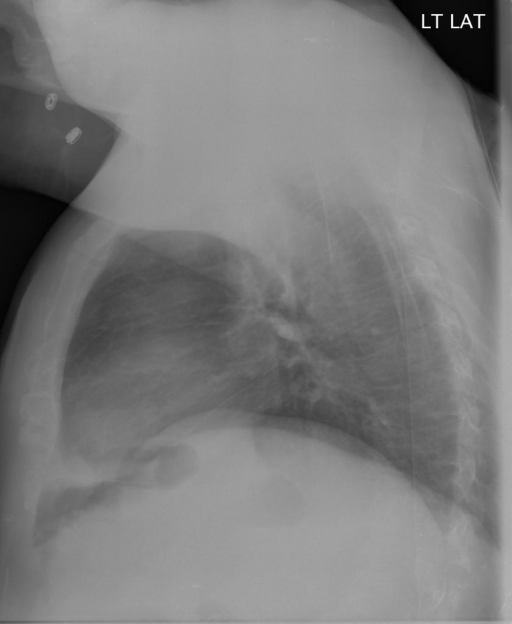

In [164]:
Image(get_iuxray_image_path(invalid_images[-3]))